# Feature Selection - Univariate

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
cancer=load_breast_cancer()

In [6]:
print(cancer.data.shape)

(569, 30)


In [9]:
#get deterministic random numbers
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))

In [10]:
print(noise.data.shape)

(569, 50)


In [11]:
#add noise features to data
#the first 30 features are from the dataset, the next 50 are noise
X_w_noise=np.hstack([cancer.data,noise])

In [12]:
print(X_w_noise.data.shape)

(569, 80)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.2)

In [37]:
#select=SelectPercentile(percentile=30)
select=SelectKBest(k=10)
select.fit(x_train,y_train)

SelectKBest()

In [38]:
#transform training set
x_train_selected=select.transform(x_train)
print("X_train.shape: {}".format(x_train.shape))
print("X_train_selected.shape: {}".format(x_train_selected.shape))

X_train.shape: (455, 80)
X_train_selected.shape: (455, 10)


[ True False  True  True False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


([], [])

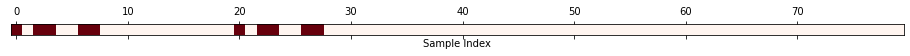

In [39]:
mask=select.get_support()
print(mask)
#visualize the mask -- red is True, white is False
plt.matshow(mask.reshape(1,-1),cmap='Reds')
plt.xlabel("Sample Index")
plt.yticks(())

In [40]:
from sklearn.tree import DecisionTreeClassifier
#transform test data
x_test_selected=select.transform(x_test)
lr=DecisionTreeClassifier()
lr.fit(x_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(x_test,y_test)))
lr.fit(x_train_selected,y_train)
print("Score with selected features: {:.3f}".format(lr.score(x_test_selected,y_test)))

Score with all features: 0.930
Score with selected features: 0.939


# Feature Selection - Model Based

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=20,random_state=42),threshold="median")

In [61]:
#Select from model

class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold

In [62]:
select.fit(x_train,y_train)
x_train_l1=select.transform(x_train)
print("x_train.shape: {}".format(x_train.shape))
print("x_train_l1.shape: {}".format(x_train_l1.shape))

x_train.shape: (455, 80)
x_train_l1.shape: (455, 40)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True False False False  True
 False  True False  True False False False  True False  True False False
 False False False  True False  True  True False False False False False
 False  True False False False False False False False False False False
  True False False False False False False  True]


([], [])

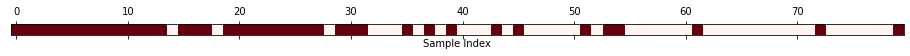

In [63]:
mask=select.get_support()
print(mask)
#visualize the mask -- red is True, white is False
plt.matshow(mask.reshape(1,-1),cmap='Reds')
plt.xlabel("Sample Index")
plt.yticks(())

In [64]:
#transform test data
x_test_l1=select.transform(x_test)
score=SVC().fit(x_train,y_train).score(x_test,y_test)
print("Score with all features: {:.3f}".format(score))
score1=SVC().fit(x_train_l1,y_train).score(x_test_l1,y_test)
print("Score with selected features: {:.3f}".format(score1))

Score with all features: 0.930
Score with selected features: 0.930


# Iterative Feature Selection

([], [])

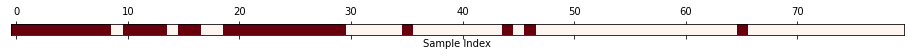

In [54]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=30)
select.fit(x_train,y_train)
#visualize the selected features
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='Reds')
plt.xlabel("Sample Index")
plt.yticks(())

In [57]:
from sklearn.linear_model import LinearRegression
#transform test data
x_train_rfe=select.transform(x_train)
x_test_rfe=select.transform(x_test)
score=LinearRegression().fit(x_train_rfe,y_train).score(x_test_rfe,y_test)
print("Score: {:.3f}".format(score))


Score: 0.723


In [59]:
print("Test Score: {:.3f}".format(select.score(x_test,y_test)))

Test Score: 0.965
